# [Cardio Vascular Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

# EDA + Data Prep

### Features (X)
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm)
- Weight | Objective Feature | weight | float (kg)
- Gender | Objective Feature | gender | categorical code
- Systolic blood pressure | Examination Feature | ap_hi | int
- Diastolic blood pressure | Examination Feature | ap_lo | int
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
- Smoking | Subjective Feature | smoke | binary
- Alcohol intake | Subjective Feature | alco | binary
- Physical activity | Subjective Feature | active | binary

In [66]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame

file_path = 'cardio_train_dataset.csv'

cardio_data_frame = pd.read_csv(file_path)

cardio_data_frame = cardio_data_frame.head(500)

## Categorical Feature Mapping

we will map our categorical feature to numerical values

In [67]:
conversion_dictionary = {'F': 1, 'M' : 2  }

cardio_data_frame = cardio_data_frame.replace({"gender" : conversion_dictionary})
cardio_data_frame.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Imputation


In [68]:
cardio_data_frame = cardio_data_frame.dropna()

cardio_data_frame = cardio_data_frame.drop('id', axis=1)

cardio_data_frame['age'] = round(cardio_data_frame['age'] / 365)

cardio_data_frame['bmi'] = round(cardio_data_frame['weight'] / (cardio_data_frame['height'] / 100)**2)

cardio_data_frame.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0


# Outliers Standardization

In [69]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(cardio_data_frame)

cardio_data_frame_std = scaler.transform(cardio_data_frame)


#cardio_data_frame.mean(axis=0)

#cardio_data_frame.std(axis=0)

In [70]:
cardio_features = ['age', 'gender', 'height','weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']

X = cardio_data_frame[cardio_features]
X.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.00000,500.000000,500.000000
mean,53.58800,1.358000,164.048000,74.426600,128.206000,92.308000,1.390000,1.2280,0.094000,0.04200,0.786000,27.736000
std,6.64127,0.479892,9.192535,16.251339,17.453619,99.929119,0.691995,0.5733,0.292121,0.20079,0.410538,6.379004
min,39.00000,1.000000,76.000000,41.000000,80.000000,30.000000,1.000000,1.0000,0.000000,0.00000,0.000000,17.000000
25%,49.00000,1.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.0000,0.000000,0.00000,1.000000,24.000000
50%,54.00000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.0000,0.000000,0.00000,1.000000,27.000000
75%,59.00000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.0000,0.000000,0.00000,1.000000,30.000000
max,65.00000,2.000000,188.000000,200.000000,190.000000,1100.000000,3.000000,3.0000,1.000000,1.00000,1.000000,95.000000


### Y Axis
 - Presence or absence of cardiovascular disease | Target Variable | cardio | binary

In [71]:
Y = cardio_data_frame.cardio
Y.describe()


count    500.000000
mean       0.526000
std        0.499824
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: cardio, dtype: float64

# Data plotting


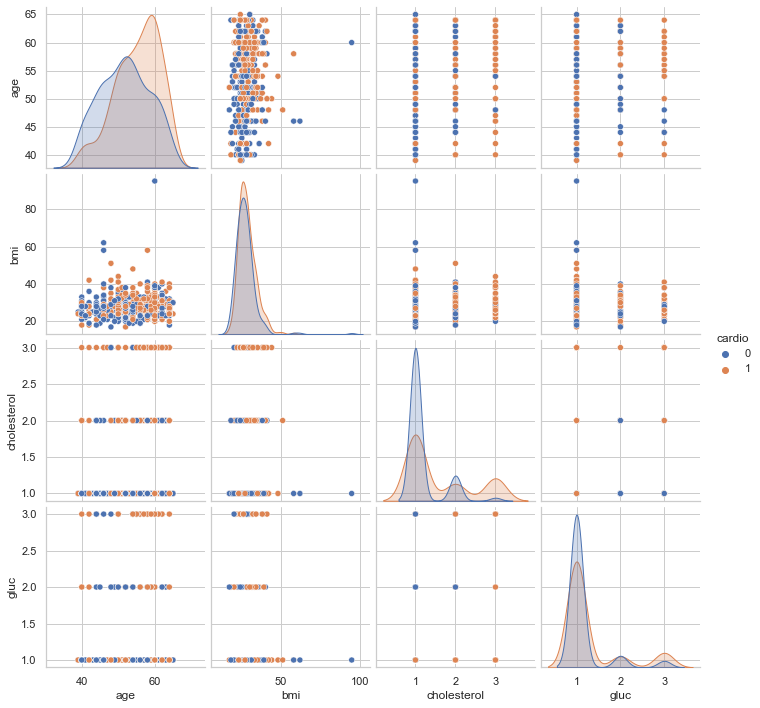

In [72]:
import seaborn as sns

sns.set_theme(style='whitegrid')

cardio_features = ['age', 'bmi', 'cholesterol', 'gluc', 'cardio']

#sns.pairplot(x_vars=cardio_features, y_vars=cardio_features, data=cardio_data_frame, palette='bright')
#cardio_data_frame[cardio_features].corr()

sns.pairplot(data=cardio_data_frame[cardio_features], hue='cardio')

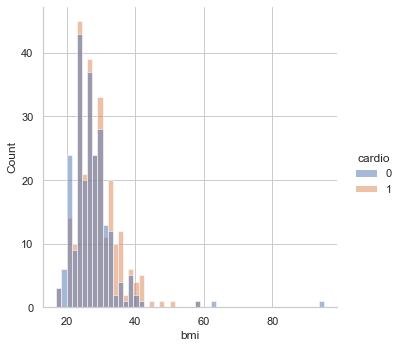

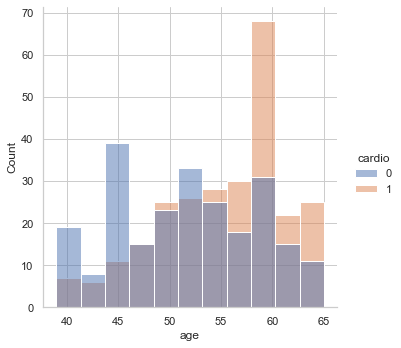

In [73]:
sns.displot(data=cardio_data_frame, x='bmi', hue='cardio')

sns.displot(data=cardio_data_frame, x='age', hue='cardio')

# x_melted = pd.melt(frame=cardio_data_frame, id_vars="cardio", value_vars=cardio_features, var_name="features", value_name="value", col_level=None)
# x_melted
#
# from matplotlib import pyplot as plt
#
# plt.figure(figsize=(10,10))
# sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
# plt.xticks(rotation=90)


# Model Tuning


# Split the Dataset

In [74]:
from sklearn.model_selection import train_test_split

trainX, validationX, trainY, validationY = train_test_split(X, Y,test_size=0.2, random_state=0)


 # 1. Decision Tree Model Implementation

In [75]:
from sklearn.tree import  DecisionTreeClassifier

# Define model. Specify a number for random_state to ensure same results each run
cardio_decision_tree_model = DecisionTreeClassifier(random_state=1)

#Fitting Model
cardio_decision_tree_model.fit(trainX, trainY)

valPredictions=cardio_decision_tree_model.predict(validationX)

### Mean Absolute Error DT

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(validationY, valPredictions)



0.32

 # 2. KNN Model Implementation

In [77]:
from sklearn.neighbors import KNeighborsClassifier

cardio_decision_knn_model = KNeighborsClassifier()

cardio_decision_knn_model.fit(trainX, trainY)

valPredictions=cardio_decision_knn_model.predict(validationX)


### Mean Absolute Error

In [78]:
mean_absolute_error(validationY, valPredictions)

0.26

 # 3. SVM Model Implementation

In [79]:
from sklearn.svm import SVC

cardio_decision_svc_model = SVC()

cardio_decision_svc_model.fit(trainX, trainY)

valPredictions=cardio_decision_svc_model.predict(validationX)


### Mean Absolute Error

In [80]:
mean_absolute_error(validationY, valPredictions)

0.32

 # 4. NN Model Implementation

In [81]:
from sklearn.neural_network import MLPClassifier

cardio_decision_nn_model = MLPClassifier(alpha=1e-5,
                                         hidden_layer_sizes=(25, 14), random_state=5)

cardio_decision_nn_model.fit(trainX, trainY)

valPredictions=cardio_decision_nn_model.predict(validationX)

### Mean Absolute Error

In [82]:
mean_absolute_error(validationY, valPredictions)


0.31

 # 5. Logistic Regression Model Implementation

In [83]:
from sklearn.linear_model import LogisticRegression

cardio_decision_lr_model = LogisticRegression( random_state=1, solver='saga')

cardio_decision_lr_model.fit(trainX, trainY)

valPredictions=cardio_decision_lr_model.predict(validationX)

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Mean Absolute Error

In [84]:
mean_absolute_error(validationY, valPredictions)

0.32

 # 6. Ensemble Model Implementation

In [85]:
from sklearn.ensemble import BaggingClassifier

cardio_decision_bagging_model = bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

cardio_decision_bagging_model.fit(trainX, trainY)

valPredictions=cardio_decision_bagging_model.predict(validationX)

### Mean Absolute Error

In [86]:
mean_absolute_error(validationY, valPredictions)


0.25

### Learning Curves

In [87]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def learning_curve_model(X, Y, model, cv, train_sizes):
    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_size=np.linspace(.1, 1.0, 15)

### Learning Curve LR

<module 'matplotlib.pyplot' from '/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

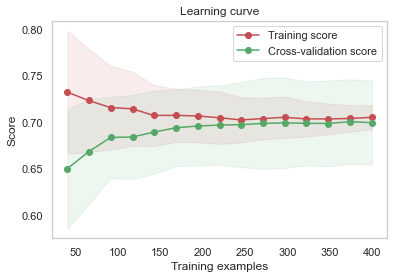

In [88]:
learning_curve_model(X, Y, cardio_decision_lr_model, cv, train_size)

### Learning Curve NN

<module 'matplotlib.pyplot' from '/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

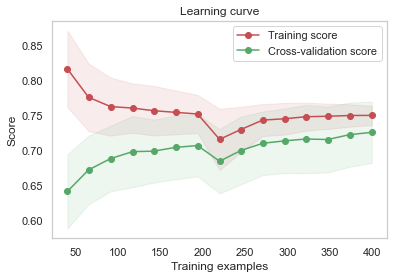

In [89]:
learning_curve_model(X, Y, cardio_decision_nn_model, cv, train_size)

### Learning Curve KNN

<module 'matplotlib.pyplot' from '/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

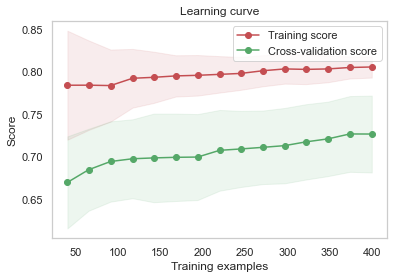

In [90]:
learning_curve_model(X, Y, cardio_decision_knn_model, cv, train_size)

### Learning Curve DT

<module 'matplotlib.pyplot' from '/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

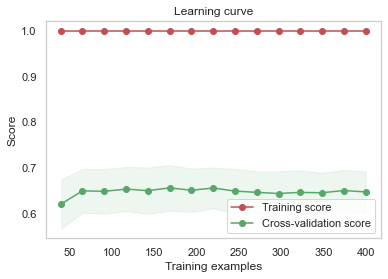

In [91]:
learning_curve_model(X, Y, cardio_decision_tree_model, cv, train_size)

### Learning Curve SVM

<module 'matplotlib.pyplot' from '/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

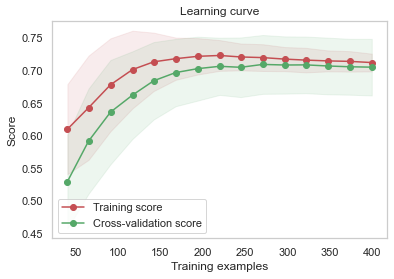

In [92]:
learning_curve_model(X, Y, cardio_decision_svc_model, cv, train_size)

### Model Comparison / Accuracy Score

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


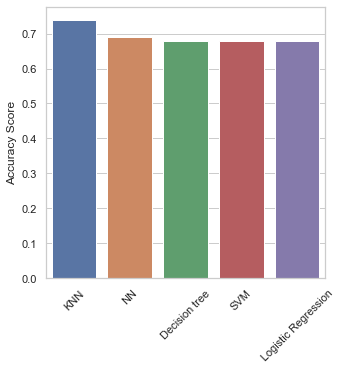

In [93]:
def drawAcuuracyGraph():

 models = {"Decision tree": cardio_decision_tree_model,
          "NN": cardio_decision_nn_model,
          "KNN": cardio_decision_knn_model,
          "SVM": cardio_decision_svc_model,
          "Logistic Regression": cardio_decision_lr_model}

 scores = {}

 for key, value in models.items():
    model = value
    model.fit(trainX, trainY)
    scores[key] = model.score(validationX, validationY)

 scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
 scores_frame.sort_values(by=["Accuracy Score"], axis=0, ascending=False, inplace=True)
 scores_frame

 plt.figure(figsize=(5, 5))
 sns.barplot(x=scores_frame.index, y=scores_frame["Accuracy Score"])
 plt.xticks(rotation=45)
drawAcuuracyGraph()

### AUC

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


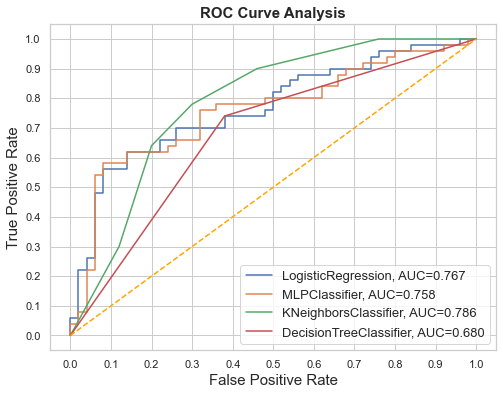

In [94]:
def drawauc():
 models = [cardio_decision_lr_model,
          cardio_decision_nn_model,
          cardio_decision_knn_model,
          cardio_decision_tree_model]

 result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])
 from sklearn.metrics import roc_curve, roc_auc_score
 import numpy as np

# Train the models and record the results

 for cls in models:
    model = cls.fit(trainX, trainY)
    yproba = model.predict_proba(validationX)[::, 1]

    fpr, tpr, _ = roc_curve(validationY, yproba)
    auc = roc_auc_score(validationY, yproba)

    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

    # Set name of the classifiers as index labels
 result_table.set_index('classifiers', inplace=True)

 fig = plt.figure(figsize=(8, 6))

 for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

 plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

 plt.xticks(np.arange(0.0, 1.1, step=0.1))
 plt.xlabel("False Positive Rate", fontsize=15)

 plt.yticks(np.arange(0.0, 1.1, step=0.1))
 plt.ylabel("True Positive Rate", fontsize=15)

 plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
 plt.legend(prop={'size': 13}, loc='lower right')

 plt.show()
drawauc()

### PCA

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


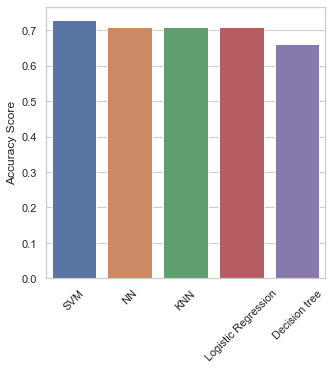

In [95]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(trainX)
trainX=pca.transform(trainX)
validationX=pca.transform(validationX)

drawAcuuracyGraph()